# 복습

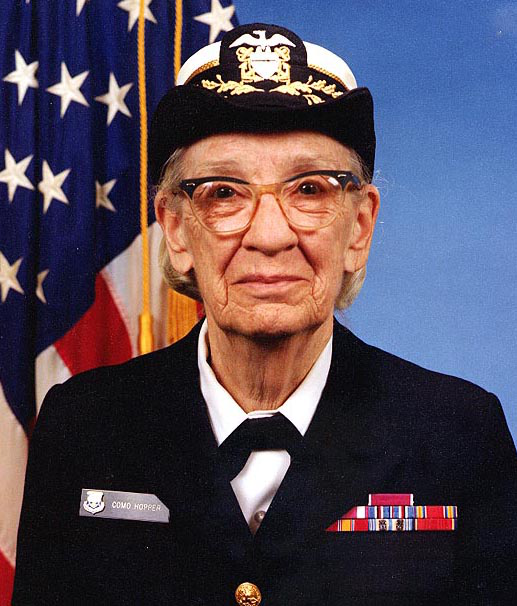

In [1]:
from PIL import Image

img_path = './grace_hopper_517x606.jpg'
Image.open(img_path)

In [2]:
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights

img = read_image('./grace_hopper_517x606.jpg')

In [3]:
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [4]:
preprocess = weights.transforms()

In [5]:
batch = [preprocess(img)]
batch[0].shape

torch.Size([3, 606, 517])

In [6]:
weights.meta['categories'][32]

'tie'

C:\Users\user\anaconda3\Lib\site-packages\torchvision\utils.py:225: UserWarning: Argument 'font_size' will be ignored since 'font' is not set.
  warnings.warn("Argument 'font_size' will be ignored since 'font' is not set.")


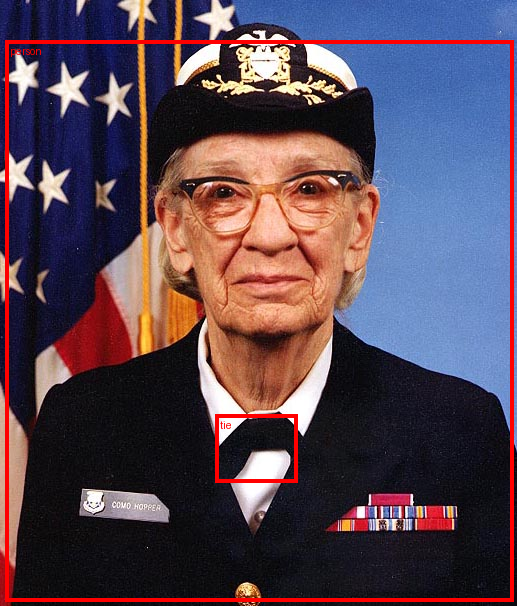

In [7]:
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta['categories'][i] for i in prediction['labels']]
box = draw_bounding_boxes(img, boxes=prediction['boxes'],
                          labels=labels,
                          colors='red',
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im

In [8]:
prediction

{'boxes': tensor([[  5.0608,  40.3002, 513.7202, 601.9224],
         [215.8641, 414.0178, 297.2356, 482.0081]], grad_fn=<StackBackward0>),
 'labels': tensor([ 1, 32]),
 'scores': tensor([0.9990, 0.9716], grad_fn=<IndexBackward0>)}

In [9]:
weights.meta['categories']

['__background__',
 'person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'N/A',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'N/A',
 'backpack',
 'umbrella',
 'N/A',
 'N/A',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'N/A',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'N/A',
 'dining table',
 'N/A',
 'N/A',
 'toilet',
 'N/A',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'N/A',
 'book',
 'clock',
 'vase',
 'scissors',
 'ted

In [10]:
len(weights.meta['categories'])

91

In [11]:
#pip install pycocotools
#!wget https://www.cis.upenn.edu/~jshi/ped_html/PennFudanPed.zip

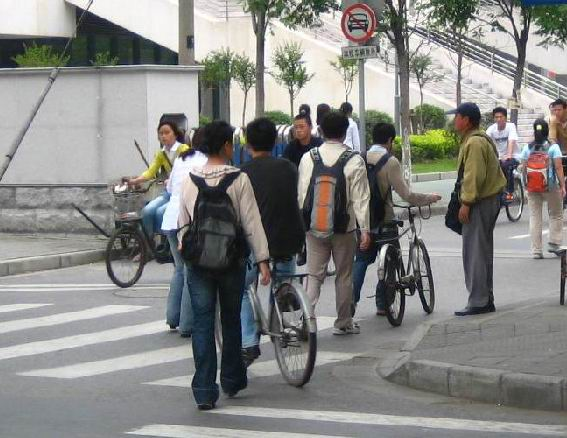

In [12]:
from PIL import Image
from torchvision.io import read_image

img_path = 'data/PennFudanPed/PNGImages/FudanPed00046.png'
image = Image.open(img_path)
image

In [13]:
import os
import torch
from torchvision.io import read_image
from torchvision.ops.boxes import masks_to_boxes
from torchvision.transforms import functional as F
from PIL import Image


class PennFudanDataset(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None):
        self.root = root
        self.transforms = transforms
        self.imgs = list(sorted(os.listdir(os.path.join(root, "PNGImages"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "PedMasks"))))

    def __getitem__(self, idx):
        # Load images and masks
        img_path = os.path.join(self.root, "PNGImages", self.imgs[idx])
        mask_path = os.path.join(self.root, "PedMasks", self.masks[idx])
        img = read_image(img_path).float()  # Convert image to float
        mask = read_image(mask_path).long()  # Convert mask to long

        # Instances are encoded as different colors
        obj_ids = torch.unique(mask)
        obj_ids = obj_ids[1:]  # Remove the background

        num_objs = len(obj_ids)
        masks = (mask == obj_ids[:, None, None]).to(dtype=torch.uint8)

        # Get bounding box coordinates for each mask
        boxes = masks_to_boxes(masks)

        # There is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        # Image ID
        image_id = torch.tensor([idx])

        # Compute area
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        
        # All instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {
            "boxes": boxes,
            "masks": masks,
            "labels": labels,
            "image_id": image_id,
            "area": area,
            "iscrowd": iscrowd
        }

        # Apply transformations
        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)


In [14]:
import torchvision.transforms.v2 as v2

my_transform = v2.Compose([
    v2.ToTensor()
])

C:\Users\user\anaconda3\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [15]:
root = './data/PennFudanPed'

dataset = PennFudanDataset(root, my_transform)

In [16]:
pwd

'C:\\practice-torch\\dev'

In [17]:
dataset[0]

(tensor([[[211., 210., 212.,  ..., 143., 146., 148.],
          [179., 173., 170.,  ..., 126., 128., 128.],
          [204., 194., 188.,  ..., 130., 131., 130.],
          ...,
          [226., 217., 211.,  ..., 183., 184., 185.],
          [231., 219., 210.,  ..., 187., 187., 186.],
          [225., 227., 215.,  ..., 190., 190., 187.]],
 
         [[200., 199., 201.,  ...,  96.,  99., 101.],
          [168., 162., 159.,  ...,  79.,  81.,  81.],
          [193., 183., 177.,  ...,  83.,  84.,  83.],
          ...,
          [220., 211., 205.,  ..., 183., 184., 185.],
          [225., 213., 204.,  ..., 187., 187., 186.],
          [219., 221., 209.,  ..., 190., 190., 187.]],
 
         [[182., 181., 183.,  ...,  78.,  81.,  83.],
          [150., 144., 141.,  ...,  61.,  63.,  63.],
          [175., 165., 159.,  ...,  65.,  66.,  65.],
          ...,
          [220., 211., 205.,  ..., 183., 184., 185.],
          [225., 213., 204.,  ..., 187., 187., 186.],
          [219., 221., 209.,  .

In [18]:
import utils

from torch.utils.data import DataLoader
data_loader = DataLoader(dataset, batch_size=2, collate_fn=utils.collate_fn)
for X_train, y_label in data_loader:
    print(X_train[0].shape)
    print(X_train[1].shape)
    print(y_label)
    break

torch.Size([3, 536, 559])
torch.Size([3, 414, 455])
({'boxes': tensor([[159., 181., 301., 430.],
        [419., 170., 534., 485.]]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8), 'labels': tensor([1, 1]), 'image_id': tensor([0]), 'area': tensor([35358., 36225.]), 'iscrowd': tensor([0, 0])}, {'boxes': tensor([[ 67.,  92., 190., 379.]]), 'masks': tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0

In [19]:
from torchvision.transforms import v2 as T


def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

In [20]:
import torchvision
import utils

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

# For Training
images, targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)  # Returns predictions
print(predictions[0])

{'loss_classifier': tensor(1.6539, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(1.2988, grad_fn=<DivBackward0>), 'loss_objectness': tensor(52.9067, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.2327, grad_fn=<DivBackward0>)}
{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}


In [21]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [22]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
def get_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
    model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)

    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [23]:
num_classes = 2
model = get_model(num_classes)
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

C:\Users\user\anaconda3\Lib\site-packages\torchvision\utils.py:211: UserWarning: boxes doesn't contain any box. No box was drawn
  warnings.warn("boxes doesn't contain any box. No box was drawn")


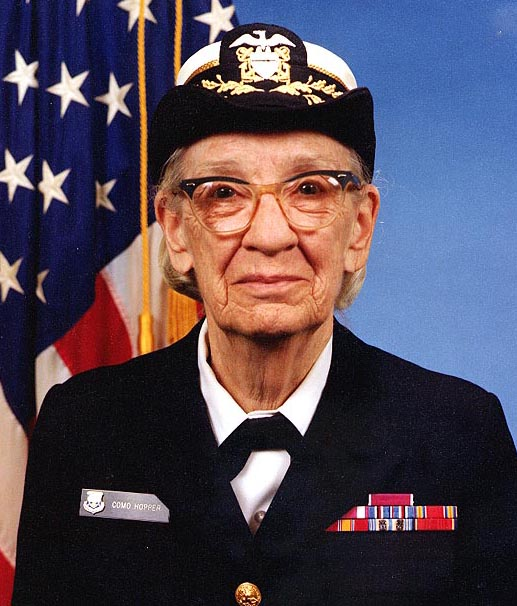

In [24]:
model.eval()

# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch = [preprocess(img)]

# Step 4: Use the model and visualize the prediction
prediction = model(batch)[0]
labels = [weights.meta["categories"][i] for i in prediction["labels"]]
box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                          labels=labels,
                          colors="red",
                          width=4, font_size=30)
im = to_pil_image(box.detach())
im

In [25]:
import utils
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# For Training
images, targets = next(iter(data_loader))
images = list(image for image in images)
targets = [{k: v for k, v in t.items()} for t in targets]
output = model(images, targets)  # Returns losses and detections
print(output)

# For inference
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
prediction = model(x)[0]  # Returns predictions
print(prediction)

{'loss_classifier': tensor(13.1568, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(2.3460, grad_fn=<DivBackward0>), 'loss_objectness': tensor(84.1547, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(0.8574, grad_fn=<DivBackward0>)}
{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>), 'labels': tensor([], dtype=torch.int64), 'scores': tensor([], grad_fn=<IndexBackward0>)}


In [26]:
prediction

{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
 'labels': tensor([], dtype=torch.int64),
 'scores': tensor([], grad_fn=<IndexBackward0>)}

In [28]:
from engine import train_one_epoch, evaluate

# train on the GPU or on the CPU, if a GPU is not available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2
# use our dataset and defined transformations
dataset = PennFudanDataset('data/PennFudanPed', get_transform(train=True))
dataset_test = PennFudanDataset('data/PennFudanPed', get_transform(train=False))

# split the dataset in train and test set
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset,
    batch_size=2,
    shuffle=True,
    collate_fn=utils.collate_fn
)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=1,
    shuffle=False,
    collate_fn=utils.collate_fn
)

# get the model using our helper function
# model = get_model_instance_segmentation(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.001,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

# let's train it just for 2 epochs
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

print("That's it!")

C:\practice-torch\dev\engine.py:30: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=scaler is not None):


Loss is nan, stopping training
{'loss_classifier': tensor(nan, grad_fn=<NllLossBackward0>), 'loss_box_reg': tensor(nan, grad_fn=<DivBackward0>), 'loss_objectness': tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>), 'loss_rpn_box_reg': tensor(nan, grad_fn=<DivBackward0>)}


SystemExit: 1

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from engine import train_one_epoch, evaluate


# get the model using our helper function
model = get_model(num_classes)

# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0005
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

# let's train it just for 2 epochs
num_epochs = 2

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, data_loader_test, device=device)

print("That's it!")

## 오토인코더

In [29]:
# 라이브러리 호출
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt

import torchvision.datasets as datasets
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
# MNIST 데이터셋을 내려받아 전처리

transform = transforms.Compose([
    transforms.ToTensor() # transforms.ToTensor()는 이미지를 파이토치의 텐서 형태로 변형시켜 줍니다.
])

train_dataset = datasets.MNIST(
    root="data", train=True, transform=transform, download=True # MNIST를 내려받은 후 텐서 형태로 변형
)

test_dataset = datasets.MNIST(
    root="data", train=False, transform=transform, download=True
)

train_loader = DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=False
)

test_loader = DataLoader(
    test_dataset, batch_size=32, shuffle=True, num_workers=4
)

In [33]:
# 네트워크(신경망) 생성

class Encoder(nn.Module): # 인코더 네트워크 생성
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()

        self.encoder_cnn = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=2, padding=1),
            nn.ReLU(True),
            nn.Conv2d(8, 16, 3, stride=2, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.Conv2d(16, 32, 3, stride=2, padding=0),
            nn.ReLU(True)
        ) # 이미지 데이터셋 처리를 위해 합성곱 신경망 이용

        self.flatten = nn.Flatten(start_dim=1) # 완전연결층
        self.encoder_lin = nn.Sequential(
            nn.Linear(3 * 3 * 32, 128),
            nn.ReLU(True),
            nn.Linear(128, encoded_space_dim)
        ) # 출력 계층

    def forward(self, x):
        x = self.encoder_cnn(x)
        x = self.flatten(x)
        x = self.encoder_lin(x)
        return x

class Decoder(nn.Module): # 디코더 네트워크 생성
    def __init__(self, encoded_space_dim, fc2_input_dim):
        super().__init__()

        self.decoder_lin = nn.Sequential(
            nn.Linear(encoded_space_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 3 * 3 * 32),
            nn.ReLU(True)
        ) # 인코더의 출력을 디코더의 입력으로 사용

        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, 3, 3)) # 인코더의 완전연결층에 대응
        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
        ) # 인코더의 합성곱층에 대응

    def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = torch.sigmoid(x)
        return x

In [34]:
# 손실 함수와 옵티마이저 지정

encoder = Encoder(encoded_space_dim=4, fc2_input_dim=128)
decoder = Decoder(encoded_space_dim=4, fc2_input_dim=128)
encoder.to(device)
decoder.to(device)

params_to_optimize = [
    {'params': encoder.parameters()},
    {'params': decoder.parameters()}
] # 인코더와 디코더에서 사용할 파라미터를 다르게 지정

optim = torch.optim.Adam(params_to_optimize, lr=0.001, weight_decay=1e-05)
loss_fn = torch.nn.MSELoss()

In [35]:
# 모델 학습 함수 생성

def train_epoch(encoder, decoder, device, dataloader, loss_fn, optimizer, noise_factor=0.3):
    encoder.train() # 인코더 훈련
    decoder.train() # 디코더 훈련
    train_loss = []
    for image_batch, _ in dataloader: # 훈련 데이터셋을 이용하여 모델 학습(비지도 학습으로 레이블은 필요하지 않습니다)
        image_noisy = add_noise(image_batch, noise_factor)
        image_noisy = image_noisy.to(device) # 데이터셋이 CPU/GPU 장치를 사용하도록 지정
        encoded_data = encoder(image_noisy) # 노이즈 데이터를 인코더의 입력으로 사용
        decoded_data = decoder(encoded_data) # 인코더 출력을 디코더의 입력으로 사용

        loss = loss_fn(decoded_data, image_noisy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.detach().cpu().numpy())

    return np.mean(train_loss)

In [36]:
# 모델 테스트 함수 생성

def test_epoch(encoder, decoder, device, dataloader, loss_fn, noise_factor=0.3):
    # Set evaluation mode for encoder and decoder
    encoder.eval() # 인코더 테스트
    decoder.eval() # 디코더 테스트

    with torch.no_grad():
        conc_out = [] # 각 배치에 대한 출력을 지정하기 위해 리스트 형싱의 변수 정의
        conc_label = []
        for image_batch, _ in dataloader:
            image_batch = image_batch.to(device)
            encoded_data = encoder(image_batch)
            decoded_data = decoder(encoded_data)
            conc_out.append(decoded_data.cpu())
            conc_label.append(image_batch.cpu())

        conc_out = torch.cat(conc_out) # 리스트 형식으로 저장된 모든 값을 하나의 텐서로 생성
        conc_label = torch.cat(conc_label)
        val_loss = loss_fn(conc_out, conc_label) # 손실 함수를 이용하여 오차 계산

    return val_loss.data
            

In [37]:
# 노이즈 데이터 생성

def add_noise(inputs, noise_factor=0.3):
    noisy = inputs + torch.randn_like(inputs) * noise_factor
    noisy = torch.clip(noisy, 0., 1.)
    return noisy

In [40]:
# 한글 깨짐 문제 해결

import matplotlib.pyplot as plt
from matplotlib import font_manager

font_fname = 'C:/Windows/Fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [41]:
# 이미지 시각화

def plot_ae_outputs(encoder, decoder, n=5, noise_factor=0.3):
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        ax = plt.subplot(3, n, i + 1) # subplot에서 사용하는 파라미터는 (행, 열, 인덱스)입니다. 3x5 형태의 이미지가 출력됩니다.
        img = test_dataset[i][0].unsqueeze(0)
        image_noisy = add_noise(img, noise_factor)
        image_noisy = image_noisy.to(device)

        encoder.eval() # 인코더 평가
        decoder.eval() # 디코더 평가
        with torch.no_grad():
            rec_img = decoder(encoder(image_noisy))

        plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray') # 테스트 데이터셋을 출력
        ax.get_xaxis().set_visible(False) # set_visible(False)는 그래프의 눈금을 표시하지 않겠다는 의미
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('원래 이미지')
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(image_noisy.cpu().squeeze().numpy(), cmap='gist_gray') # 테스트 데이터셋에 노이즈가 적용된 결과를 출력
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('노이즈가 적용되어 손상된 이미지')

        ax = plt.subplot(3, n, i + 1 + n + n)
        plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray') # 노이즈가 추가된 이미지를 인코더와 디코더에 적용한 결과를 출력
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n // 2:
            ax.set_title('재구성된 이미지')

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.7,
                        top=0.9,
                        wspace=0.3,
                        hspace=0.3) # subplots_adjust()를 이용하여 subplots들이 겹치지 않도록 최소한의 여백을 만들어 줍니다.
    plt.show()

EPOCH 1/30

 EPOCH 1/30 	 train loss 0.069 	 val loss 0.049


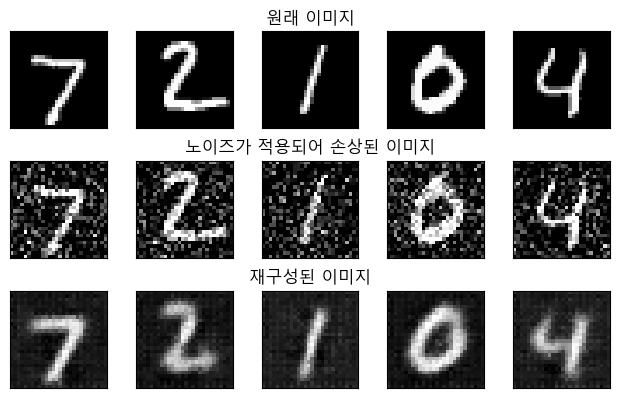

EPOCH 2/30

 EPOCH 2/30 	 train loss 0.054 	 val loss 0.043


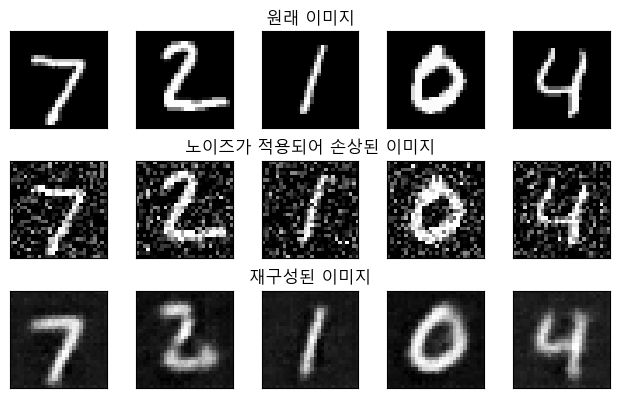

EPOCH 3/30

 EPOCH 3/30 	 train loss 0.053 	 val loss 0.042


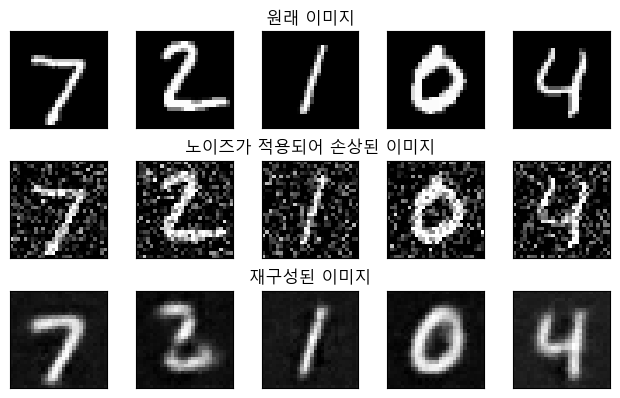

EPOCH 4/30

 EPOCH 4/30 	 train loss 0.052 	 val loss 0.041


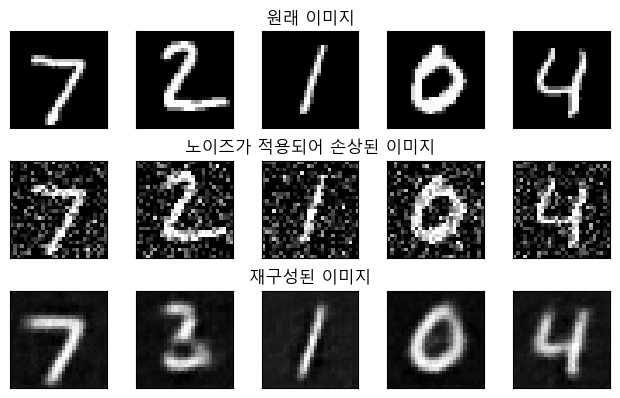

EPOCH 5/30

 EPOCH 5/30 	 train loss 0.051 	 val loss 0.041


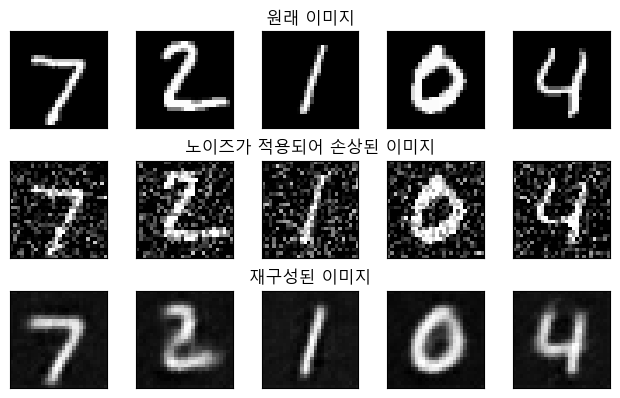

EPOCH 6/30

 EPOCH 6/30 	 train loss 0.051 	 val loss 0.040


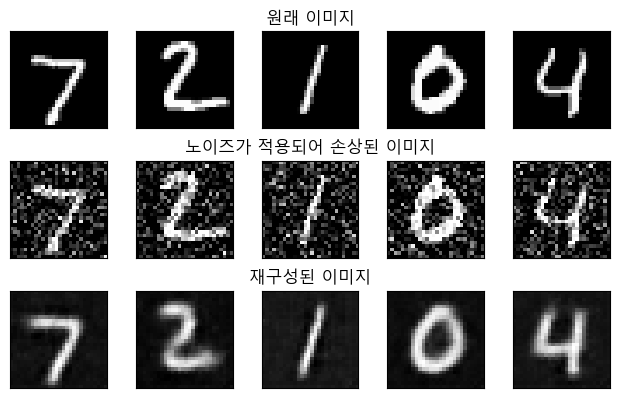

EPOCH 7/30

 EPOCH 7/30 	 train loss 0.051 	 val loss 0.040


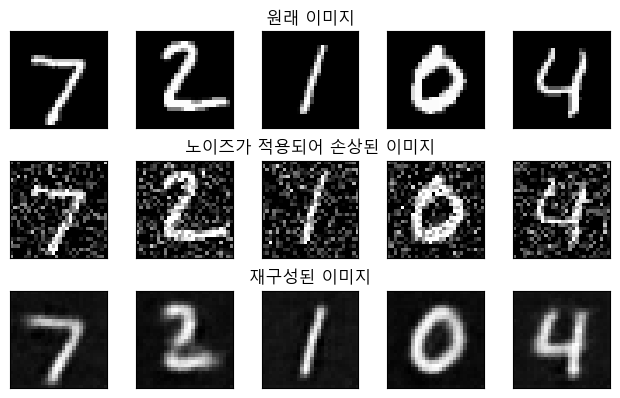

EPOCH 8/30

 EPOCH 8/30 	 train loss 0.051 	 val loss 0.040


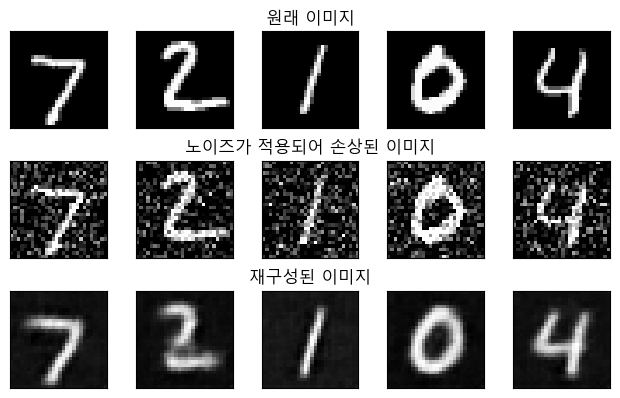

EPOCH 9/30

 EPOCH 9/30 	 train loss 0.050 	 val loss 0.039


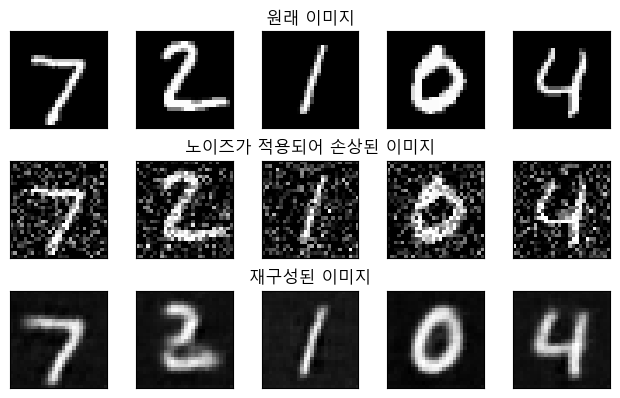

EPOCH 10/30

 EPOCH 10/30 	 train loss 0.050 	 val loss 0.039


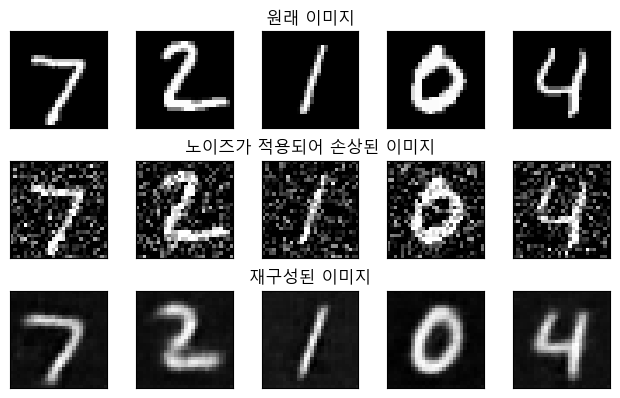

EPOCH 11/30

 EPOCH 11/30 	 train loss 0.050 	 val loss 0.039


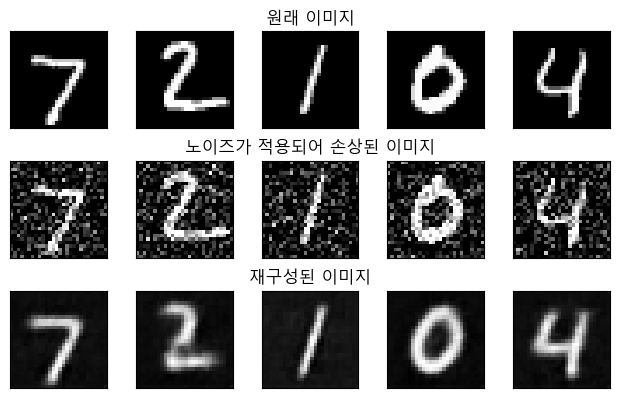

EPOCH 12/30

 EPOCH 12/30 	 train loss 0.050 	 val loss 0.039


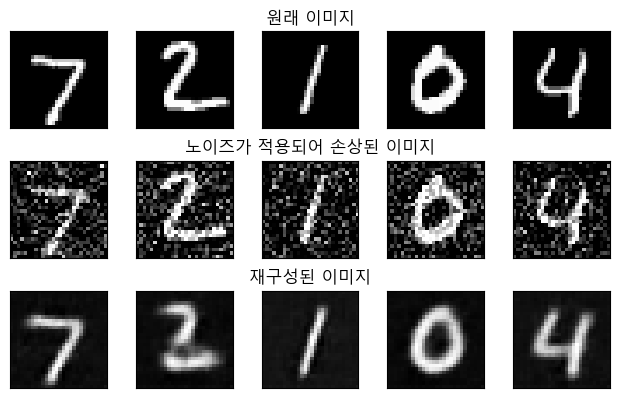

EPOCH 13/30

 EPOCH 13/30 	 train loss 0.050 	 val loss 0.038


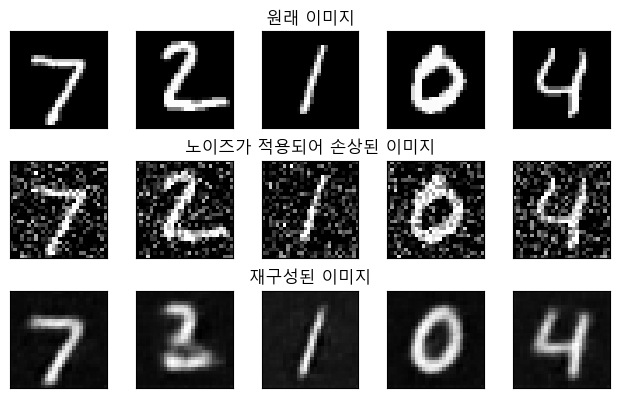

EPOCH 14/30

 EPOCH 14/30 	 train loss 0.050 	 val loss 0.039


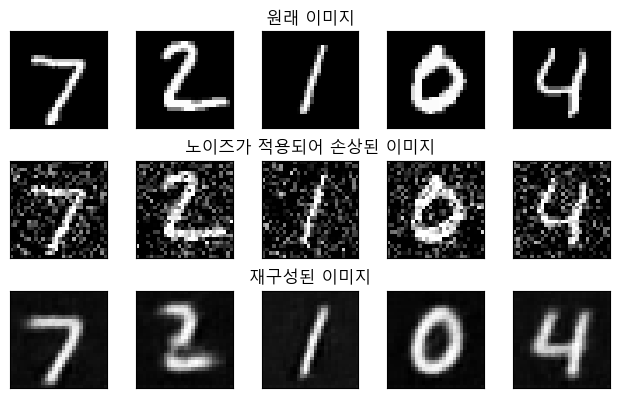

EPOCH 15/30

 EPOCH 15/30 	 train loss 0.050 	 val loss 0.039


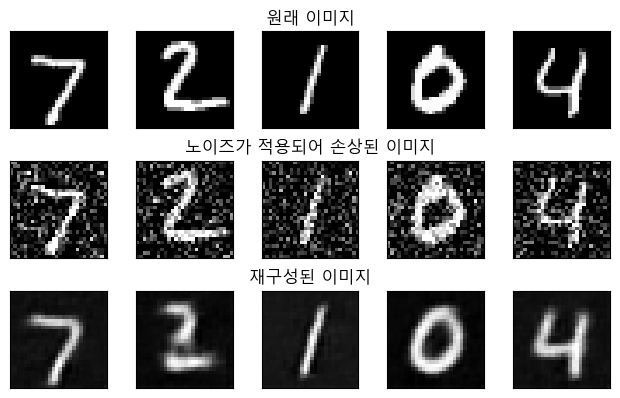

EPOCH 16/30

 EPOCH 16/30 	 train loss 0.050 	 val loss 0.038


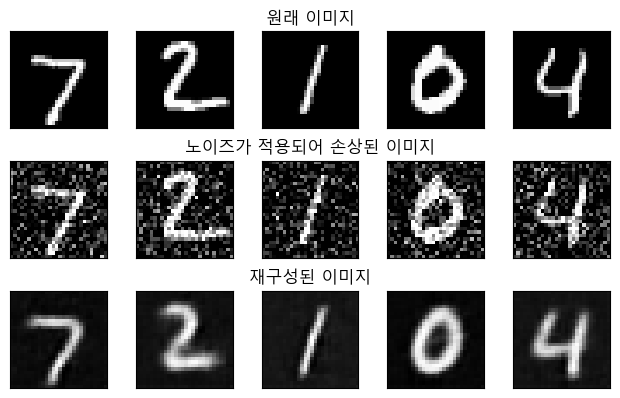

EPOCH 17/30

 EPOCH 17/30 	 train loss 0.050 	 val loss 0.038


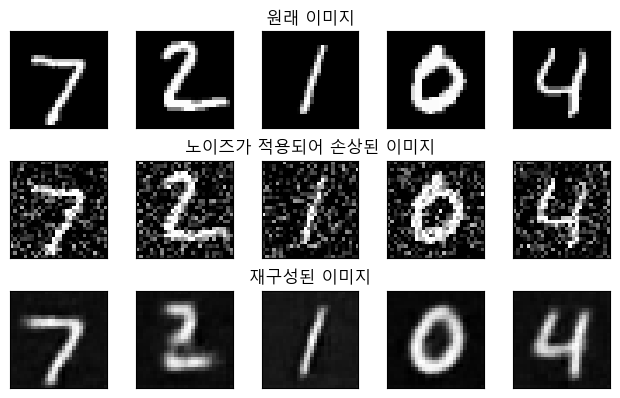

EPOCH 18/30

 EPOCH 18/30 	 train loss 0.050 	 val loss 0.038


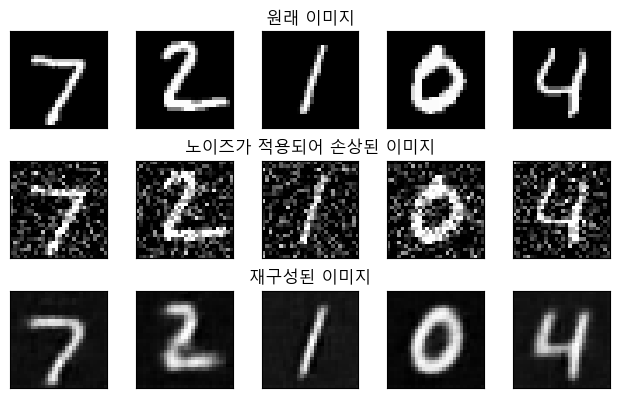

EPOCH 19/30

 EPOCH 19/30 	 train loss 0.050 	 val loss 0.038


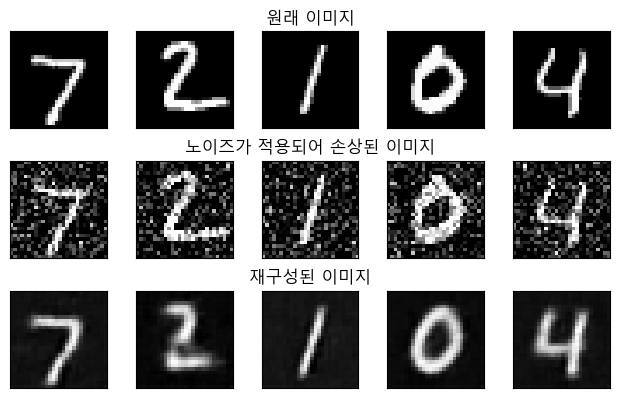

EPOCH 20/30

 EPOCH 20/30 	 train loss 0.050 	 val loss 0.038


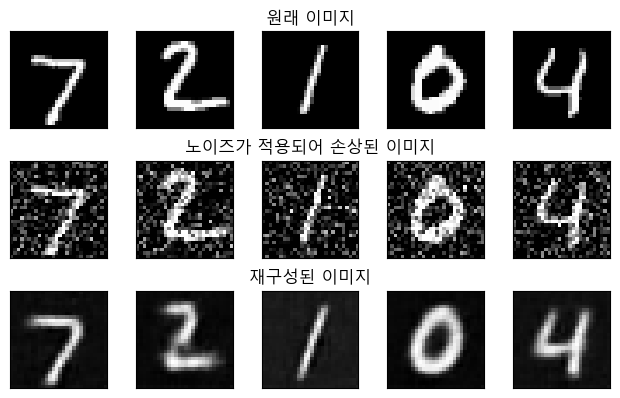

EPOCH 21/30

 EPOCH 21/30 	 train loss 0.049 	 val loss 0.038


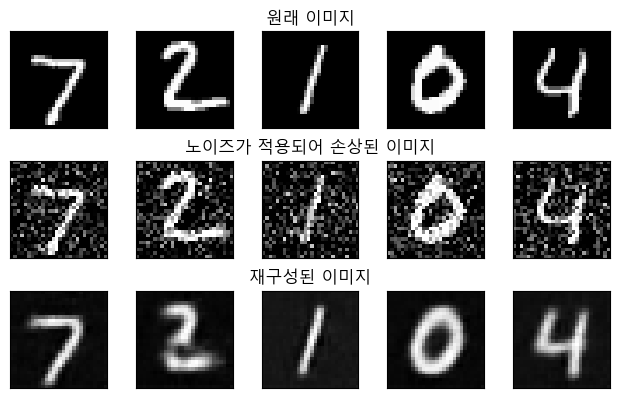

EPOCH 22/30

 EPOCH 22/30 	 train loss 0.049 	 val loss 0.038


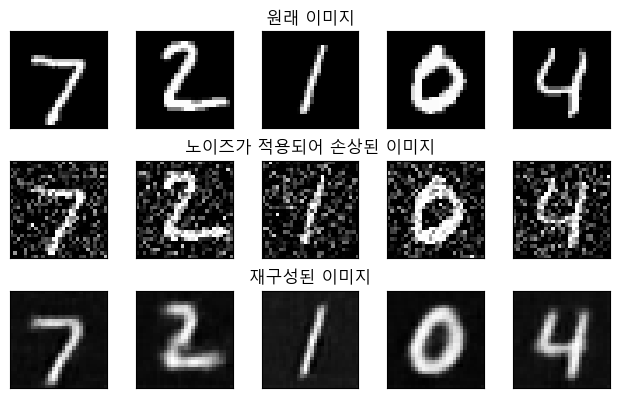

EPOCH 23/30

 EPOCH 23/30 	 train loss 0.049 	 val loss 0.038


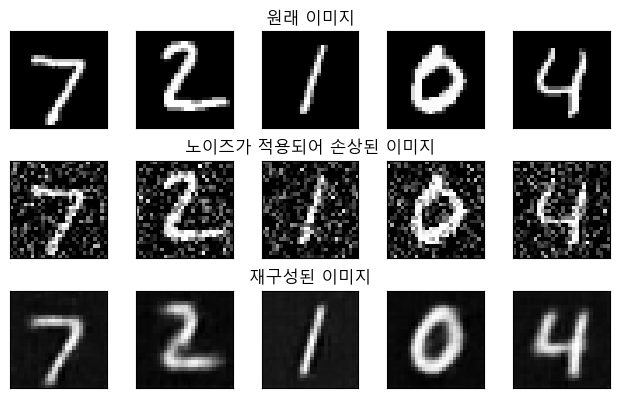

EPOCH 24/30

 EPOCH 24/30 	 train loss 0.049 	 val loss 0.038


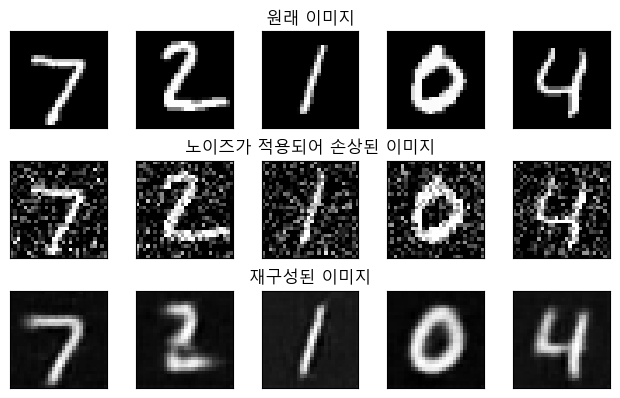

EPOCH 25/30

 EPOCH 25/30 	 train loss 0.049 	 val loss 0.038


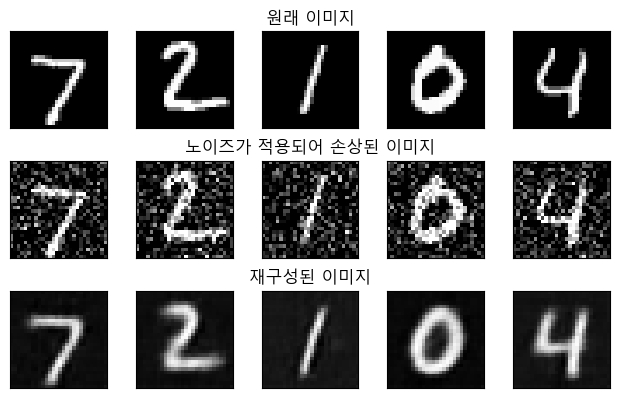

EPOCH 26/30

 EPOCH 26/30 	 train loss 0.049 	 val loss 0.038


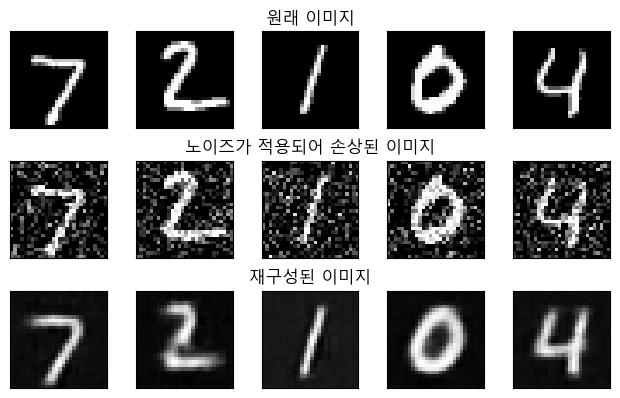

EPOCH 27/30

 EPOCH 27/30 	 train loss 0.049 	 val loss 0.038


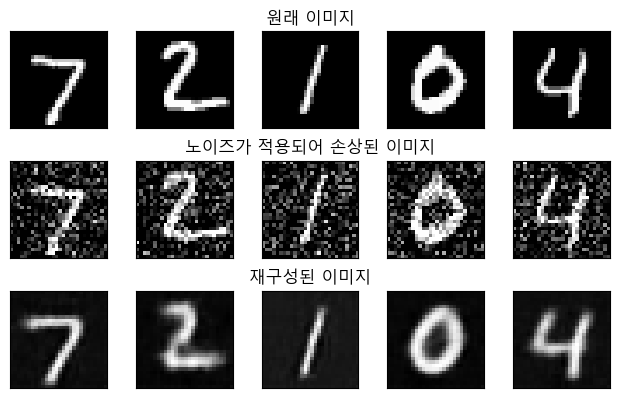

EPOCH 28/30

 EPOCH 28/30 	 train loss 0.049 	 val loss 0.038


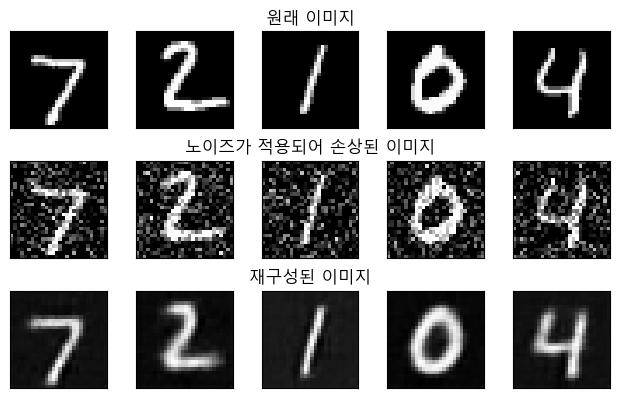

EPOCH 29/30

 EPOCH 29/30 	 train loss 0.049 	 val loss 0.038


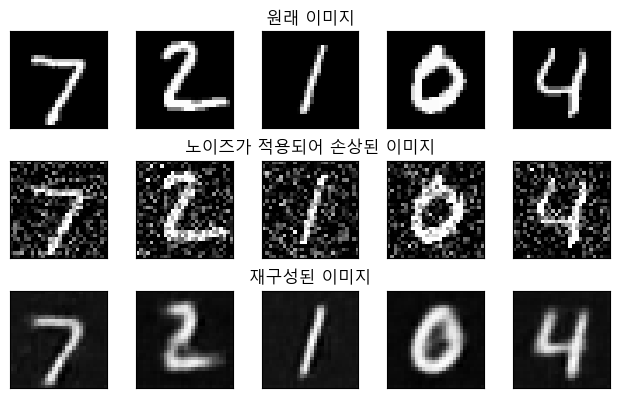

EPOCH 30/30

 EPOCH 30/30 	 train loss 0.049 	 val loss 0.037


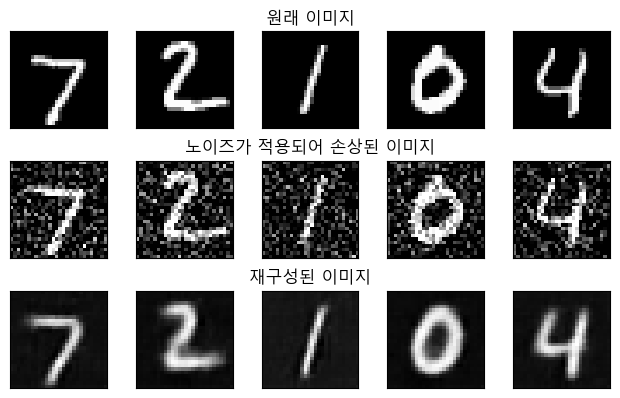

In [42]:
# 모델 학습

import numpy as np

num_epochs = 30
history_da = {'train_loss':[], 'val_loss':[]}
loss_fn = torch.nn.MSELoss()

for epoch in range(num_epochs):
    print('EPOCH %d/%d' % (epoch + 1, num_epochs))
    train_loss = train_epoch(
        encoder = encoder,
        decoder = decoder,
        device = device,
        dataloader = train_loader,
        loss_fn = loss_fn,
        optimizer = optim, 
        noise_factor=0.3
    ) # 모델 학습 함수(train_epoch)를 이용하여 모델 학습

    val_loss = test_epoch(
        encoder = encoder,
        decoder = decoder,
        device = device,
        dataloader = test_loader,
        loss_fn = loss_fn,
        noise_factor=0.3
    ) # 모델 검증(테스트) 함수(test_epoch)를 이용하여 테스트

    history_da['train_loss'].append(train_loss)
    history_da['val_loss'].append(val_loss)
    print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs, train_loss, val_loss))
    plot_ae_outputs(encoder, decoder, noise_factor=0.3)

## 변형 오토인코더